--- WiDiD: Incremental Word Sense Discovery for Parliamentary Speeches ---
Term 27, Year 1–2

In [6]:
# ## Imports 
%pip install "elasticsearch==8.6.2" sentence-transformers scikit-learn pandas matplotlib
from elasticsearch import Elasticsearch
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re, os


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/wbagger/Documents/Semantic-Analysis-of-TBMM-Transcripts/myenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# ## Configuration
INDEX_NAME = "parliament_speeches"
ES_URL = "http://localhost:9200"   # adjust if different
TERM = 27
TARGET_WORDS = ["katar", "salça", "doğalgaz", "afrika", "anne"]  # add more words if needed
OUTPUT_DIR = "./widid_results"
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [8]:
# ## Connect to Elasticsearch
es = Elasticsearch(ES_URL)
print("Connected to Elasticsearch ")
print(es.info().body["version"]["number"])

Connected to Elasticsearch 
8.6.1


## Helper Functions

In [9]:
def fetch_speeches(term, year, size=10000):
    """Fetch speeches for a specific term and year."""
    query = {
        "size": size,
        "_source": ["content", "term", "year"],
        "query": {
            "bool": {
                "must": [
                    {"term": {"term": term}},
                    {"term": {"year": year}}
                ]
            }
        }
    }
    res = es.search(index=INDEX_NAME, body=query)
    return [hit["_source"]["content"] for hit in res["hits"]["hits"]]

In [10]:
def extract_contexts(texts, target_word, window=10):
    """Extract short context windows around target word and its morphological variations."""
    contexts = []
    # Create regex pattern to match target word and any Turkish suffixes
    pattern = re.compile(rf"\b{re.escape(target_word.lower())}\w*\b")
    
    for t in texts:
        tokens = re.findall(r"\w+", t.lower()) # simple tokenization, one or more word characters 
        for i, tok in enumerate(tokens):
            # Use regex to match the word and its variations
            if pattern.match(tok):
                start = max(0, i - window)
                end = min(len(tokens), i + window + 1)
                snippet = " ".join(tokens[start:end])
                contexts.append(snippet)
    return contexts

In [12]:
def compute_embeddings(model, contexts):
    """Compute embeddings for context snippets."""
    if len(contexts) == 0:
        return np.empty((0, model.get_sentence_embedding_dimension()))
    return model.encode(contexts, show_progress_bar=True)

In [11]:
def get_cluster_prototypes(X, labels):
    """Compute centroids for each cluster."""
    clusters = []
    for label in np.unique(labels):
        members = X[labels == label]
        centroid = np.mean(members, axis=0)
        clusters.append(centroid)
    return np.array(clusters)

In [13]:
def show_top_contexts(contexts, labels, n=3):
    """Print representative contexts for each cluster."""
    df = pd.DataFrame({"cluster": labels, "context": contexts})
    grouped = df.groupby("cluster")["context"].apply(list)
    for cluster, examples in grouped.items():
        print(f"\n🌀 Cluster {cluster} ({len(examples)} examples):")
        for ex in examples[:n]:
            print("   •", ex[:200].replace("\n", " ") + ("..." if len(ex) > 200 else ""))

In [14]:
# ## Load Sentence Transformer Model
model = SentenceTransformer("all-MiniLM-L6-v2") 
print("Model loaded ")

Model loaded 


## 6️⃣ Main Loop Over Words



===  Analyzing 'katar' (Term 27) ===


/var/folders/z8/s1r54khs3b3g5pz151jsffdr0000gn/T/ipykernel_37249/291667405.py:15: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index=INDEX_NAME, body=query)


Contexts Year1: 39, Year2: 137


Batches: 100%|██████████| 5/5 [00:00<00:00,  5.20it/s]


 Year 1 clusters: 8
 Year 2 clusters: 12

=== Year 1 Clusters ===

🌀 Cluster 0 (1 examples):
   • dünkü toplantısında cumhurbaşkanı yardımcısı sayın fuat oktay cumhurbaşkanının binmesi için katar dan alınan uçan sarayla ilgili sorulara hem cevap vermiş hem

🌀 Cluster 1 (2 examples):
   • ithal ediyoruz rusya azerbaycan i ran ve lng olarak cezayir katar nijerya gibi ülkelerden 8 10 çeşit kaynak ülkenin ürünlerini burada
   • amerika görüşüyor rusya görüşüyor i ran görüşüyor suudi arabistan görüşüyor katar görüşüyor ama siz görüşmüyorsunuz neden çünkü öyle bir angajmana girdiniz

🌀 Cluster 2 (3 examples):
   • gaz aramalarına ses çıkaracak kadar dahi gücünüz yok sizin bu katar a bağlılığınız sessizliğiniz nereden geliyor siz hangi cüretle tank palet
   • bağlılığınız sessizliğiniz nereden geliyor siz hangi cüretle tank palet fabrikasını katar a peşkeş çekiyorsunuz hangi cüretle hangi bedeller karşılığında yeşil dolarlar
   • ve kendi özüne güvenmeyen bir anlayış bugün tank palet fabrikas

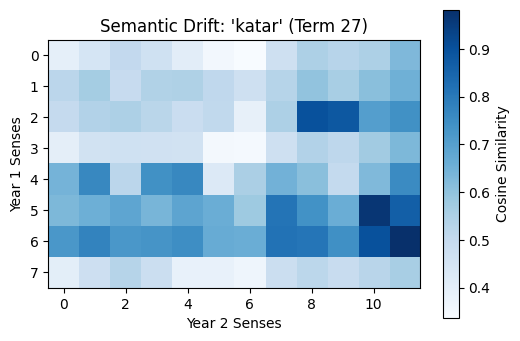

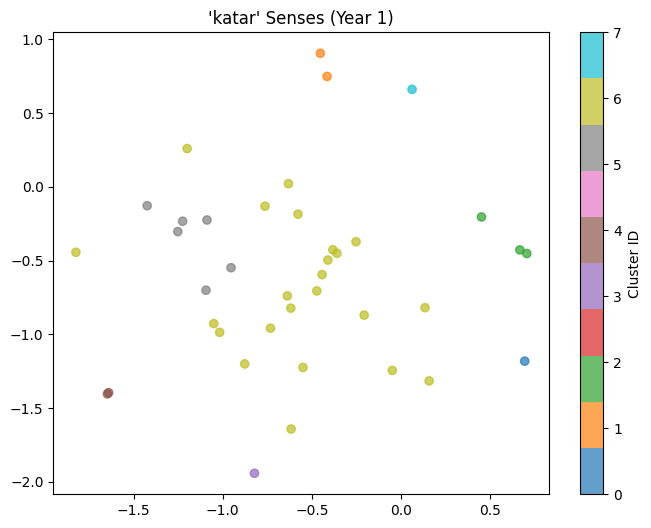

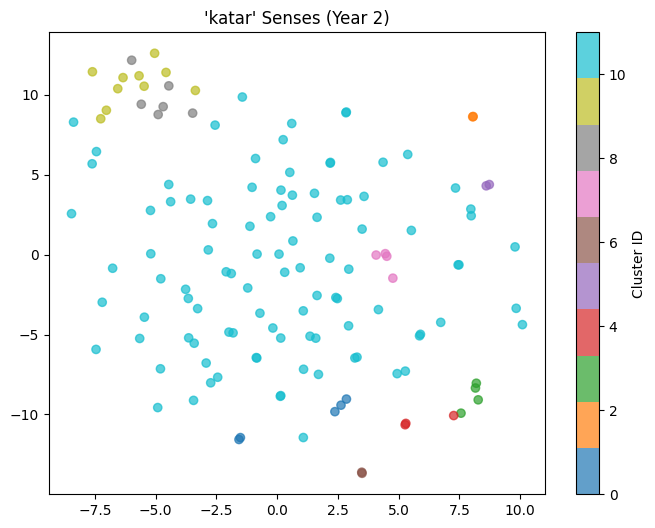

✅ Visualizations saved for 'katar'
-----------------------------------------------------


===  Analyzing 'salça' (Term 27) ===


/var/folders/z8/s1r54khs3b3g5pz151jsffdr0000gn/T/ipykernel_37249/291667405.py:15: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index=INDEX_NAME, body=query)


Contexts Year1: 3, Year2: 2
 Not enough contexts for one of the years, skipping...


===  Analyzing 'doğalgaz' (Term 27) ===
Contexts Year1: 3, Year2: 7
 Not enough contexts for one of the years, skipping...


===  Analyzing 'afrika' (Term 27) ===
Contexts Year1: 45, Year2: 163


Batches: 100%|██████████| 6/6 [00:01<00:00,  5.87it/s]


 Year 1 clusters: 7
 Year 2 clusters: 13

=== Year 1 Clusters ===

🌀 Cluster 0 (2 examples):
   • bu kapsamda 2018 yılında 21 ülkeyle 131 ikili görüşme gerçekleştirdik afrika yla ekonomik iş forumu gerçekleştirdik ve bunlardan ekim ayında gerçekleştirdiğimiz
   • ekonomik iş forumu gerçekleştirdik ve bunlardan ekim ayında gerçekleştirdiğimiz foruma afrika dan 27 ülke bakan ve bakan yardımcısı seviyesinde katılmış bulunmaktadır

🌀 Cluster 1 (5 examples):
   • desteklenen o örgütler bugün bütün dünyayı kana bulayan örgütlerdir bugün afrika da suriye de irak ta dünyanın dört bir yanını kanatan
   • gazetecilerin endeksinde 180 ülke var biz 157 nciyiz arkadaşlar yani afrika nın bazı ülkeleri kuzey kore suudi arabistan gibi ülkelerle aynı
   • değerli milletvekilleri dünya ülkeleri kendi kömüründen istifade ediyor hatta güney afrika kömürünün yüzde 90 ını kendisi çıkarıyor ve kendisi kullanıyor almanya

🌀 Cluster 2 (22 examples):
   • irak ın değil bütün bir orta doğu nun bütün bir afrika n

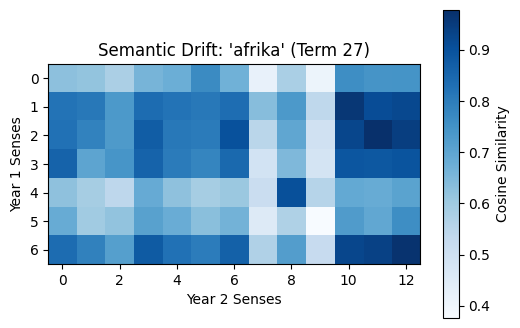

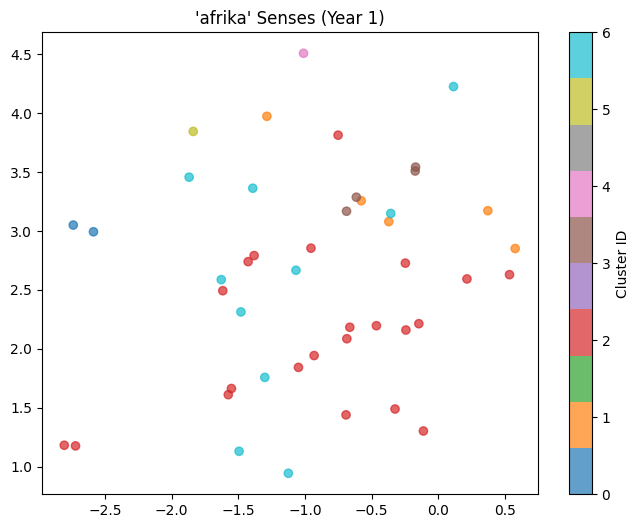

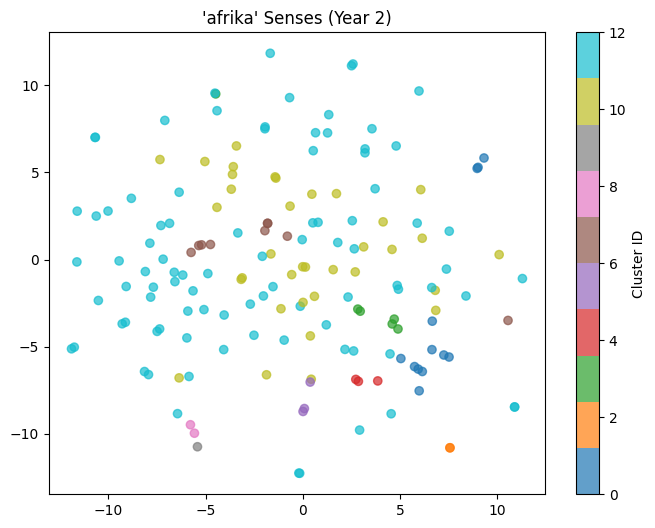

✅ Visualizations saved for 'afrika'
-----------------------------------------------------


===  Analyzing 'anne' (Term 27) ===


/var/folders/z8/s1r54khs3b3g5pz151jsffdr0000gn/T/ipykernel_37249/291667405.py:15: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index=INDEX_NAME, body=query)


Contexts Year1: 95, Year2: 132


Batches: 100%|██████████| 5/5 [00:00<00:00,  5.86it/s]


 Year 1 clusters: 16
 Year 2 clusters: 10

=== Year 1 Clusters ===

🌀 Cluster 0 (14 examples):
   • namazı sırasında verdiği bilgiye göre bir hafta önce izne gelmiş anne ve babasını mezarlığa götürmüş ben şehit olursam beni buraya defnedin
   • hdp li seçmenlerimizin birinin evine baskın yapıldı polisler tarafından evde anne baba ve çocuk bulunuyor şöyle bir şey söylemiş polis üçünüzden
   • tam 72 bin kişi kim bilir ne umutlarla açtığı belki anne babasından kalan iş yerlerini kapatmak zorunda kaldı milyarlarca lira kobi

🌀 Cluster 1 (15 examples):
   • can gelin evladımız mardin deki saldırıda yaralanmıştı yoğun bakımdaydı ailesiyle anne ve babasıyla konuştuk kendisine buradan sağlık diliyorum geçmiş olsun dileklerimi
   • birlikte gayrettepe emniyet müdürlüğü siyasi şubeye götürüldü gayrettepe ye giden anne elmas eren hayrettin in gözaltına alınırken kullandığı otomobili siyasi şubenin
   • nın döşediği mayınların patlamasıyla yaşamını yitirdi terör örgütünü şiddetle lanetliyorum ann

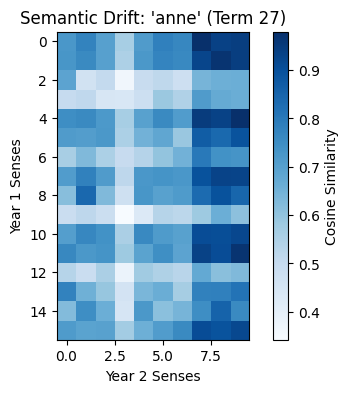

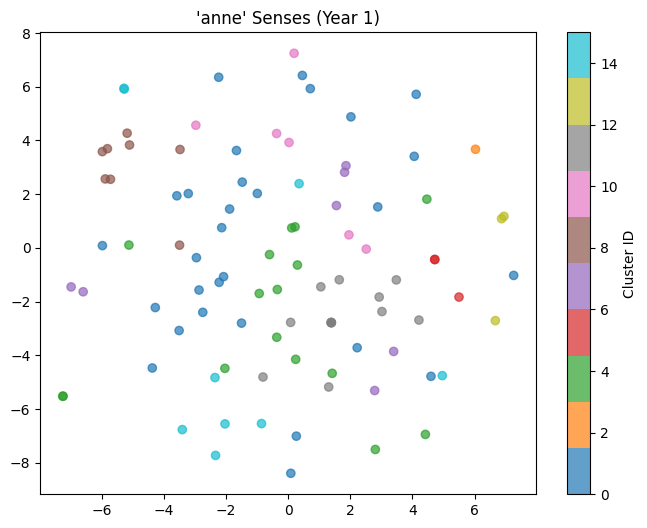

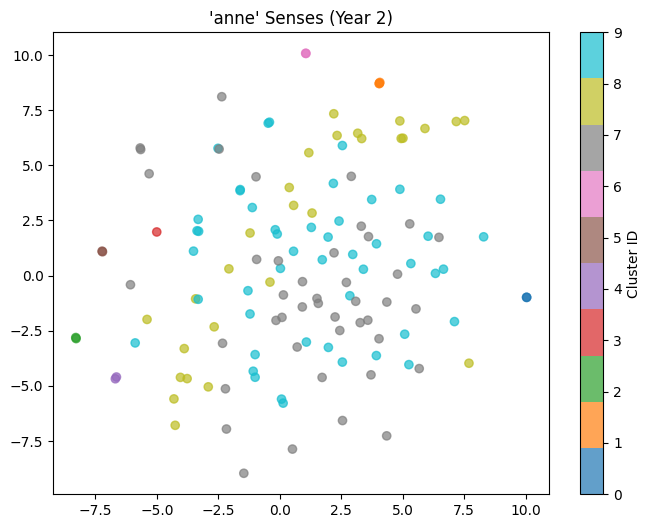

✅ Visualizations saved for 'anne'
-----------------------------------------------------


In [13]:
for target_word in TARGET_WORDS:
    print(f"\n\n===  Analyzing '{target_word}' (Term {TERM}) ===")

    # Fetch data
    texts_y1 = fetch_speeches(TERM, 2)
    texts_y2 = fetch_speeches(TERM, 3)

    # Extract contexts
    contexts_y1 = extract_contexts(texts_y1, target_word)
    contexts_y2 = extract_contexts(texts_y2, target_word)
    print(f"Contexts Year1: {len(contexts_y1)}, Year2: {len(contexts_y2)}")

    if len(contexts_y1) < 30 or len(contexts_y2) < 30:
        print(" Not enough contexts for one of the years, skipping...")
        continue

    # Compute embeddings
    emb_y1 = compute_embeddings(model, contexts_y1)
    emb_y2 = compute_embeddings(model, contexts_y2)

    # --- Year 1: AP ---
    ap1 = AffinityPropagation(random_state=42)
    ap1.fit(emb_y1)
    labels_y1 = ap1.labels_
    prototypes_y1 = get_cluster_prototypes(emb_y1, labels_y1)
    print(f" Year 1 clusters: {len(prototypes_y1)}")

    # --- Year 2: APP (Incremental) ---
    combined = np.vstack([emb_y2, prototypes_y1])
    ap2 = AffinityPropagation(random_state=42)
    ap2.fit(combined)
    labels_combined = ap2.labels_
    labels_y2 = labels_combined[:len(emb_y2)]
    prototypes_y2 = get_cluster_prototypes(combined, labels_combined)
    print(f" Year 2 clusters: {len(prototypes_y2)}")

    # --- Print representative contexts ---
    print("\n=== Year 1 Clusters ===")
    show_top_contexts(contexts_y1, labels_y1)
    print("\n=== Year 2 Clusters ===")
    show_top_contexts(contexts_y2, labels_y2)

    # --- Save CSV results ---
    df_y1 = pd.DataFrame({"year": 1, "context": contexts_y1, "cluster": labels_y1})
    df_y2 = pd.DataFrame({"year": 2, "context": contexts_y2, "cluster": labels_y2})
    df_all = pd.concat([df_y1, df_y2], ignore_index=True)
    csv_path = os.path.join(OUTPUT_DIR, f"widid_term{TERM}_{target_word}.csv")
    df_all.to_csv(csv_path, index=False)
    print(f"Saved clusters to {csv_path}")

    # --- Compare prototypes (semantic drift) ---
    sim_matrix = cosine_similarity(prototypes_y1, prototypes_y2)
    df_sim = pd.DataFrame(sim_matrix, 
                          index=[f"Y1_{i}" for i in range(len(prototypes_y1))],
                          columns=[f"Y2_{j}" for j in range(len(prototypes_y2))])

    plt.figure(figsize=(6,4))
    plt.imshow(sim_matrix, cmap="Blues")
    plt.colorbar(label="Cosine Similarity")
    plt.title(f"Semantic Drift: '{target_word}' (Term {TERM})")
    plt.xlabel("Year 2 Senses")
    plt.ylabel("Year 1 Senses")
    heatmap_path = os.path.join(OUTPUT_DIR, f"heatmap_{target_word}.png")
    plt.savefig(heatmap_path, bbox_inches="tight")
    plt.show()

    # --- Visualize clusters with t-SNE ---
    tsne_y1 = TSNE(n_components=2, random_state=42).fit_transform(emb_y1)
    tsne_y2 = TSNE(n_components=2, random_state=42).fit_transform(emb_y2)

    plt.figure(figsize=(8,6))
    plt.scatter(tsne_y1[:,0], tsne_y1[:,1], c=labels_y1, cmap="tab10", label="Year 1", alpha=0.7)
    plt.title(f"'{target_word}' Senses (Year 1)")
    plt.colorbar(label="Cluster ID")
    plt.savefig(os.path.join(OUTPUT_DIR, f"tsne_y1_{target_word}.png"), bbox_inches="tight")
    plt.show()

    plt.figure(figsize=(8,6))
    plt.scatter(tsne_y2[:,0], tsne_y2[:,1], c=labels_y2, cmap="tab10", label="Year 2", alpha=0.7)
    plt.title(f"'{target_word}' Senses (Year 2)")
    plt.colorbar(label="Cluster ID")
    plt.savefig(os.path.join(OUTPUT_DIR, f"tsne_y2_{target_word}.png"), bbox_inches="tight")
    plt.show()

    print(f" Visualizations saved for '{target_word}'")
    print("-----------------------------------------------------")



===  Analyzing 'üniversite' (Term 23, Year 1) ===
Contexts: 0
 Not enough contexts, skipping...


===  Analyzing 'üniversite' (Term 24, Year 1) ===
Contexts: 0
 Not enough contexts, skipping...


===  Analyzing 'üniversite' (Term 25, Year 1) ===
Contexts: 1
 Not enough contexts, skipping...


===  Analyzing 'üniversite' (Term 26, Year 1) ===


/var/folders/z8/s1r54khs3b3g5pz151jsffdr0000gn/T/ipykernel_77839/291667405.py:15: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index=INDEX_NAME, body=query)


Contexts: 6650


Batches: 100%|██████████| 208/208 [00:40<00:00,  5.14it/s]


 Visualizations saved for 'üniversite' (Term 26, Year 1)


===  Analyzing 'üniversite' (Term 27, Year 1) ===
Contexts: 6
 Not enough contexts, skipping...


===  Analyzing 'üniversite' (Term 28, Year 1) ===


/var/folders/z8/s1r54khs3b3g5pz151jsffdr0000gn/T/ipykernel_77839/291667405.py:15: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index=INDEX_NAME, body=query)


Contexts: 28
 Not enough contexts, skipping...


===  Analyzing 'üniversite' (Term 23, Year 2) ===
Contexts: 0
 Not enough contexts, skipping...


===  Analyzing 'üniversite' (Term 24, Year 2) ===
Contexts: 80


Batches: 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]


 Visualizations saved for 'üniversite' (Term 24, Year 2)


===  Analyzing 'üniversite' (Term 25, Year 2) ===
Contexts: 0
 Not enough contexts, skipping...


===  Analyzing 'üniversite' (Term 26, Year 2) ===


/var/folders/z8/s1r54khs3b3g5pz151jsffdr0000gn/T/ipykernel_77839/291667405.py:15: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index=INDEX_NAME, body=query)


Contexts: 1438


Batches: 100%|██████████| 45/45 [00:08<00:00,  5.47it/s]


 Visualizations saved for 'üniversite' (Term 26, Year 2)


===  Analyzing 'üniversite' (Term 27, Year 2) ===


/var/folders/z8/s1r54khs3b3g5pz151jsffdr0000gn/T/ipykernel_77839/291667405.py:15: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index=INDEX_NAME, body=query)


Contexts: 1093


Batches: 100%|██████████| 35/35 [00:05<00:00,  6.16it/s]


 Visualizations saved for 'üniversite' (Term 27, Year 2)


===  Analyzing 'üniversite' (Term 23, Year 3) ===
Contexts: 0
 Not enough contexts, skipping...


===  Analyzing 'üniversite' (Term 24, Year 3) ===


/var/folders/z8/s1r54khs3b3g5pz151jsffdr0000gn/T/ipykernel_77839/291667405.py:15: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index=INDEX_NAME, body=query)


Contexts: 53


Batches: 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]


 Visualizations saved for 'üniversite' (Term 24, Year 3)


===  Analyzing 'üniversite' (Term 26, Year 3) ===


/var/folders/z8/s1r54khs3b3g5pz151jsffdr0000gn/T/ipykernel_77839/291667405.py:15: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index=INDEX_NAME, body=query)


Contexts: 2802


Batches: 100%|██████████| 88/88 [00:14<00:00,  6.04it/s]


 Visualizations saved for 'üniversite' (Term 26, Year 3)


===  Analyzing 'üniversite' (Term 27, Year 3) ===


/var/folders/z8/s1r54khs3b3g5pz151jsffdr0000gn/T/ipykernel_77839/291667405.py:15: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index=INDEX_NAME, body=query)


Contexts: 1662


Batches: 100%|██████████| 52/52 [00:07<00:00,  6.55it/s]


 Visualizations saved for 'üniversite' (Term 27, Year 3)


===  Analyzing 'üniversite' (Term 23, Year 4) ===
Contexts: 24
 Not enough contexts, skipping...


===  Analyzing 'üniversite' (Term 27, Year 4) ===


/var/folders/z8/s1r54khs3b3g5pz151jsffdr0000gn/T/ipykernel_77839/291667405.py:15: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index=INDEX_NAME, body=query)


Contexts: 1174


Batches: 100%|██████████| 37/37 [00:06<00:00,  5.79it/s]


 Visualizations saved for 'üniversite' (Term 27, Year 4)


===  Analyzing 'üniversite' (Term 23, Year 5) ===
Contexts: 19
 Not enough contexts, skipping...


===  Analyzing 'üniversite' (Term 27, Year 5) ===


/var/folders/z8/s1r54khs3b3g5pz151jsffdr0000gn/T/ipykernel_77839/291667405.py:15: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index=INDEX_NAME, body=query)


Contexts: 1200


Batches: 100%|██████████| 38/38 [00:06<00:00,  6.10it/s]


 Visualizations saved for 'üniversite' (Term 27, Year 5)


===  Analyzing 'üniversite' (Term 27, Year 6) ===
Contexts: 0
 Not enough contexts, skipping...


/var/folders/z8/s1r54khs3b3g5pz151jsffdr0000gn/T/ipykernel_77839/291667405.py:15: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  res = es.search(index=INDEX_NAME, body=query)


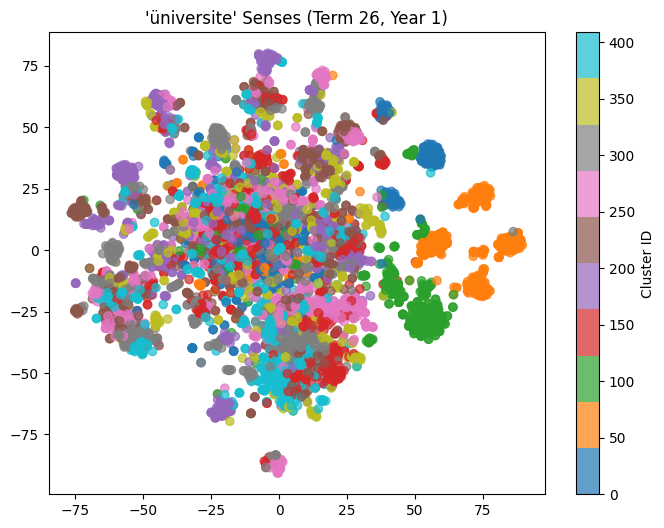

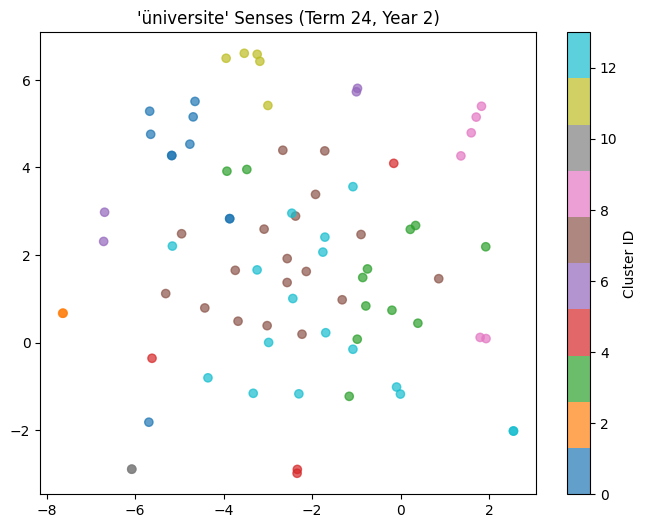

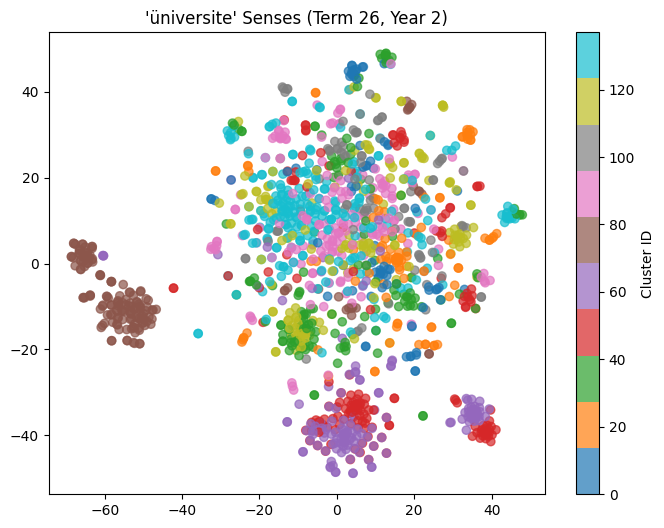

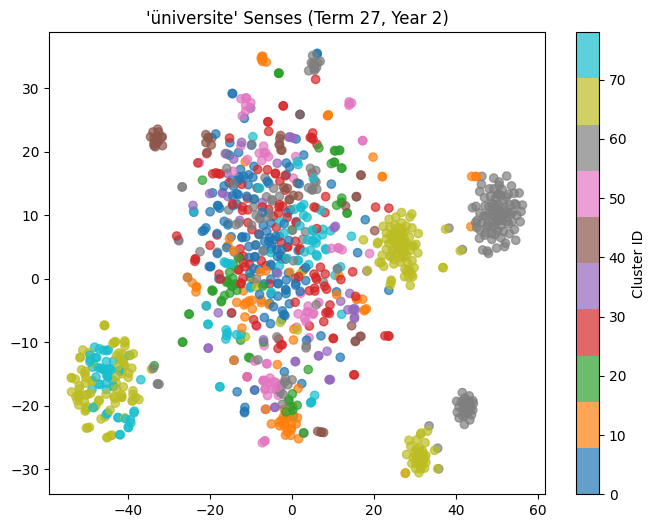

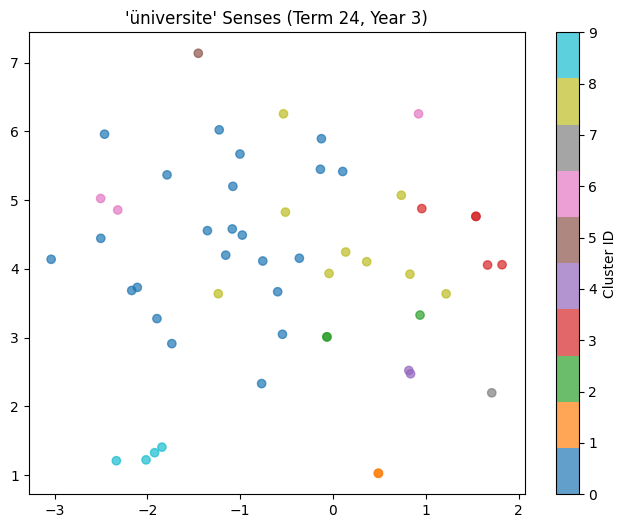

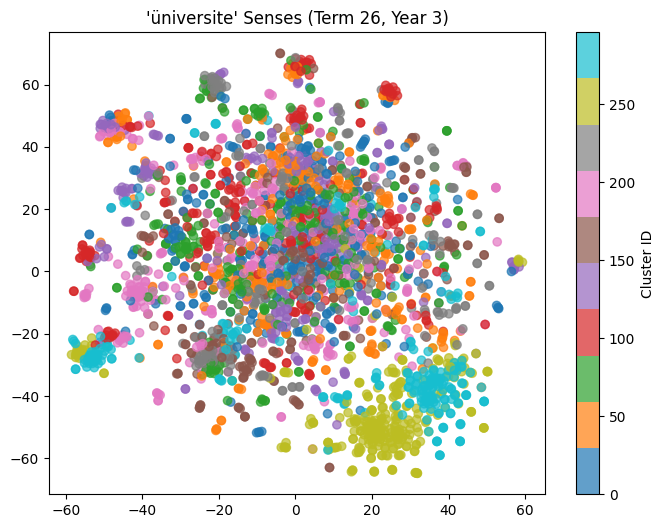

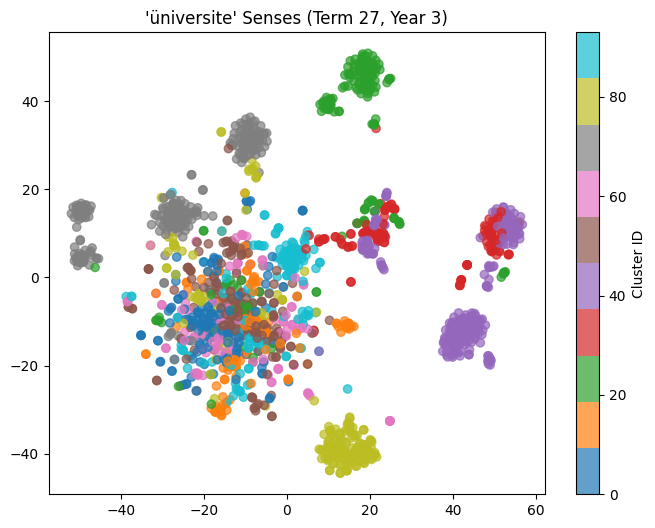

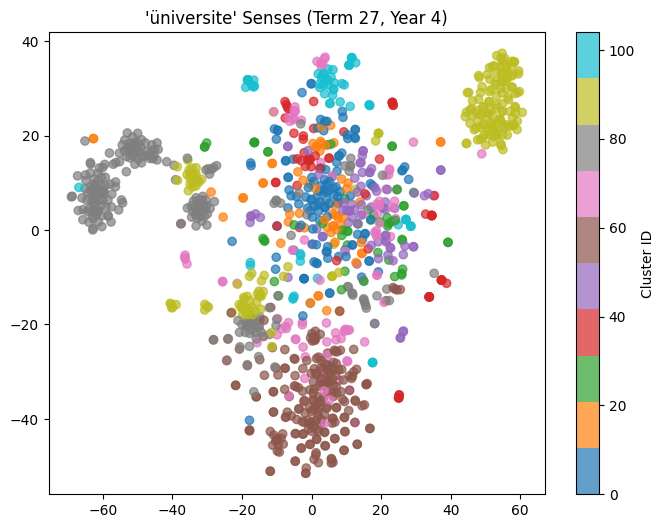

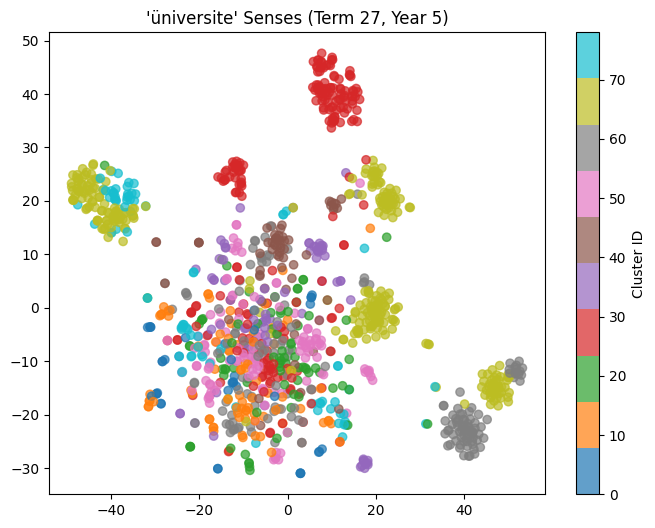

In [22]:
#second main for tsne img for terms 23,24,25,26,27,28
terms_and_years = [(23,1), (24,1), (25,1), (26,1), (27,1), (28,1),
    (23, 2), (24, 2), (25, 2), (26, 2), (27, 2),
                   (23, 3), (24, 3), (26, 3), (27, 3),
                     (23, 4), (27, 4),
                        (23, 5), (27, 5),(27,6)
                   ]
OUTPUT_DIR = "./widid_results/tsne_results_üniversite"
os.makedirs(OUTPUT_DIR, exist_ok=True)
TARGET_WORDS= ["üniversite"]
for term, year in terms_and_years:
    for target_word in TARGET_WORDS:
        print(f"\n\n===  Analyzing '{target_word}' (Term {term}, Year {year}) ===")

        # Fetch data
        texts = fetch_speeches(term, year)

        # Extract contexts
        contexts = extract_contexts(texts, target_word)
        print(f"Contexts: {len(contexts)}")

        if len(contexts) < 30:
            print(" Not enough contexts, skipping...")
            continue

        # Compute embeddings
        emb = compute_embeddings(model, contexts)

        # --- t-SNE Visualization with colors representign clusters  ---
        ap = AffinityPropagation(random_state=42)
        ap.fit(emb)
        labels = ap.labels_
        tsne = TSNE(n_components=2, random_state=42).fit_transform(emb)
        plt.figure(figsize=(8,6))
        plt.scatter(tsne[:,0], tsne[:,1], c=labels, cmap="tab10", alpha=0.7)
        plt.title(f"'{target_word}' Senses (Term {term}, Year {year})")
        plt.colorbar(label="Cluster ID")
        tsne_path = os.path.join(OUTPUT_DIR, f"tsne_term{term}_year{year}_{target_word}.png")
        plt.savefig(tsne_path, bbox_inches="tight")
        #plt.show()
        print(f" Visualizations saved for '{target_word}' (Term {term}, Year {year})")